# Analyze Visium H&E data

In [1]:
%matplotlib inline

In [2]:
!pip install --q squidpy

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.8/87.8 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.3/148.3 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.4/124.4 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.9/68.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.3/159.3 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
import numpy as np
import pandas as pd

import anndata as ad
import scanpy as sc
import squidpy as sq

sc.logging.print_header()
print(f"squidpy=={sq.__version__}")

# load the pre-processed dataset
img = sq.datasets.visium_hne_image()
adata = sq.datasets.visium_hne_adata()

/usr/local/lib/python3.10/dist-packages/cudf/utils/_ptxcompiler.py:61: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.10/dist-packages/numba/cuda/cudadrv/driver.py", line 295, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))
/usr/local/lib/python3.10/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Function "cuInit" not found
  warnings.warn(str(e))


scanpy==1.10.2 anndata==0.10.8 umap==0.5.6 numpy==1.26.4 scipy==1.13.1 pandas==2.1.4 scikit-learn==1.3.2 statsmodels==0.14.2 igraph==0.11.6 pynndescent==0.5.13
squidpy==1.6.0


  0%|          | 0.00/380M [00:00<?, ?B/s]

  0%|          | 0.00/314M [00:00<?, ?B/s]

In [4]:
adata

AnnData object with n_obs × n_vars = 2688 × 18078
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [5]:
adata.to_df()

,Xkr4,Sox17,Mrpl15,Lypla1,Tcea1,Rgs20,Atp6v1h,Oprk1,Npbwr1,Rb1cc1,...,mt-Nd5,mt-Nd6,mt-Cytb,Vamp7,Spry3,Tmlhe,Gm10931,AC149090.1,CAAA01118383.1,CAAA01147332.1
AAACAAGTATCTCCCA-1,0.000000,0.000000,0.878931,0.878931,1.339373,0.000000,1.892102,0.0,0.0,0.878931,...,4.096836,2.084631,6.202361,0.000000,0.000000,0.0,0.0,1.653450,0.000000,0.0
AAACAATCTACTAGCA-1,0.000000,0.000000,1.092216,1.092216,1.092216,0.000000,1.601758,0.0,0.0,0.000000,...,4.359961,2.389163,6.276406,0.000000,0.000000,0.0,0.0,1.092216,0.000000,0.0
AAACACCAATAACTGC-1,0.000000,0.000000,0.000000,0.000000,0.980359,0.000000,0.605794,0.0,0.0,0.980359,...,3.485626,0.605794,6.001489,0.980359,0.000000,0.0,0.0,0.980359,0.000000,0.0
AAACAGAGCGACTCCT-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.422348,0.0,0.0,0.997705,...,4.241067,1.814197,6.314055,0.000000,0.000000,0.0,0.0,1.814197,0.997705,0.0
AAACCGGGTAGGTACC-1,0.000000,0.000000,0.996971,0.000000,0.617901,0.000000,0.000000,0.0,0.0,1.486167,...,3.871757,0.617901,6.127832,0.617901,0.617901,0.0,0.0,1.486167,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTGTGTGTCAAGA-1,0.000000,0.000000,0.583463,0.000000,1.216899,1.216899,0.949520,0.0,0.0,0.583463,...,3.271525,0.000000,5.756720,0.000000,0.000000,0.0,0.0,1.216899,1.216899,0.0
TTGTTTCACATCCAGG-1,0.000000,0.478638,0.478638,0.000000,0.800992,0.478638,1.403489,0.0,0.0,0.000000,...,3.583265,0.000000,5.705683,0.478638,0.478638,0.0,0.0,1.044376,0.000000,0.0
TTGTTTCATTAGTCTA-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.172420,...,3.716893,1.883198,5.818850,0.000000,0.000000,0.0,0.0,1.697375,1.172420,0.0
TTGTTTCCATACAACT-1,0.690514,0.000000,0.690514,0.690514,0.000000,0.000000,0.690514,0.0,0.0,0.690514,...,3.983809,1.382342,6.081514,0.690514,0.000000,0.0,0.0,1.382342,0.690514,0.0


In [6]:
img

ImageContainer[shape=(11757, 11291), layers=['image']]

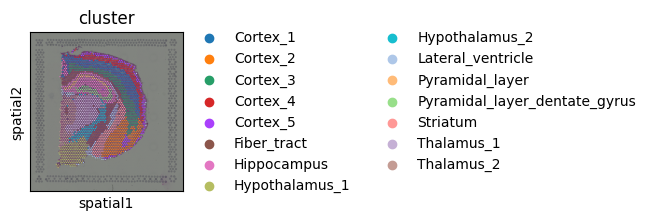

In [7]:
sq.pl.spatial_scatter(adata, color="cluster")

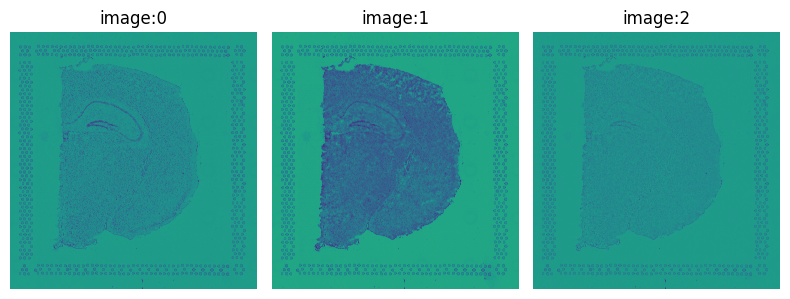

In [8]:
img.show(channelwise=True)

In [11]:
# helper function returning a clustering
def cluster_features(features: pd.DataFrame, like=None) -> pd.Series:
    """
    Calculate leiden clustering of features.

    Specify filter of features using `like`.
    """
    # filter features
    if like is not None:
        features = features.filter(like=like)
    # create temporary adata to calculate the clustering
    adata = ad.AnnData(features)
    # important - feature values are not scaled, so need to scale them before PCA
    sc.pp.scale(adata)
    # calculate leiden clustering
    sc.pp.pca(adata, n_comps=min(10, features.shape[1] - 1))
    sc.pp.neighbors(adata)
    sc.tl.leiden(adata)

    return adata.obs["leiden"]


# calculate feature clusters
adata.obs["features_cluster"] = cluster_features(adata.obsm["features"], like="summary")

# compare feature and gene clusters
sq.pl.spatial_scatter(adata, color=["features_cluster", "cluster"])# calculate features for different scales (higher value means more context)
for scale in [1.0, 2.0]:
    feature_name = f"features_summary_scale{scale}"
    sq.im.calculate_image_features(
        adata,
        img.compute(),
        features="summary",
        key_added=feature_name,
        scale=scale,
    )


# combine features in one dataframe
adata.obsm["features"] = pd.concat(
    [adata.obsm[f] for f in adata.obsm.keys() if "features_summary" in f],
    axis="columns",
)
# make sure that we have no duplicated feature names in the combined table
adata.obsm["features"].columns = ad.utils.make_index_unique(
    adata.obsm["features"].columns
)

  0%|          | 0/2688 [00:00<?, ?/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/2688 [00:00<?, ?/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


<ipython-input-12-7375abfd9068>:18: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata)


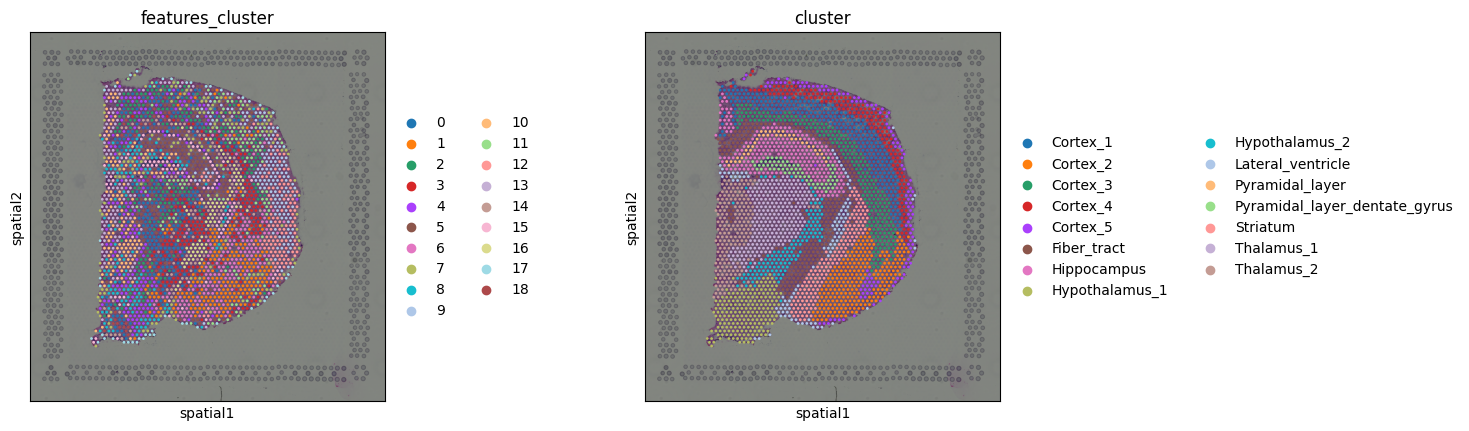

In [12]:
# helper function returning a clustering
def cluster_features(features: pd.DataFrame, like=None) -> pd.Series:
    """
    Calculate leiden clustering of features.

    Specify filter of features using `like`.
    """
    # filter features
    if like is not None:
        features = features.filter(like=like)
    # create temporary adata to calculate the clustering
    adata = ad.AnnData(features)
    # important - feature values are not scaled, so need to scale them before PCA
    sc.pp.scale(adata)
    # calculate leiden clustering
    sc.pp.pca(adata, n_comps=min(10, features.shape[1] - 1))
    sc.pp.neighbors(adata)
    sc.tl.leiden(adata)

    return adata.obs["leiden"]


# calculate feature clusters
adata.obs["features_cluster"] = cluster_features(adata.obsm["features"], like="summary")

# compare feature and gene clusters
sq.pl.spatial_scatter(adata, color=["features_cluster", "cluster"])

In [13]:
adata

AnnData object with n_obs × n_vars = 2688 × 18078
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'cluster', 'features_cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'spatial', 'umap', 'features_cluster_colors'
    obsm: 'X_pca', 'X_umap', 'spatial', 'features_summary_scale1.0', 'features_summary_scale2.0', 'features'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [15]:
adata.obsm["features"].head()

,summary_ch-0_quantile-0.9,summary_ch-0_quantile-0.5,summary_ch-0_quantile-0.1,summary_ch-0_mean,summary_ch-0_std,summary_ch-1_quantile-0.9,summary_ch-1_quantile-0.5,summary_ch-1_quantile-0.1,summary_ch-1_mean,summary_ch-1_std,...,summary_ch-1_quantile-0.9-1,summary_ch-1_quantile-0.5-1,summary_ch-1_quantile-0.1-1,summary_ch-1_mean-1,summary_ch-1_std-1,summary_ch-2_quantile-0.9-1,summary_ch-2_quantile-0.5-1,summary_ch-2_quantile-0.1-1,summary_ch-2_mean-1,summary_ch-2_std-1
AAACAAGTATCTCCCA-1,132.0,111.0,77.0,107.571140,21.767668,102.0,79.0,54.0,78.586668,19.153915,...,99.0,79.0,56.0,78.123248,17.307853,134.0,112.0,90.0,111.994919,17.550044
AAACAATCTACTAGCA-1,140.0,111.0,80.0,109.815175,25.047208,87.0,60.0,39.0,61.846105,19.495044,...,85.0,60.0,39.0,61.372806,18.517388,133.0,108.0,85.0,108.325969,18.951807
AAACACCAATAACTGC-1,132.0,116.0,89.0,112.421285,19.088559,109.0,91.0,67.0,89.382780,16.884106,...,108.0,90.0,68.0,88.907493,16.411915,129.0,116.0,98.0,114.225193,13.425479
AAACAGAGCGACTCCT-1,136.0,116.0,93.0,115.085217,17.450778,115.0,82.0,58.0,84.919202,22.004344,...,114.0,82.0,60.0,84.458654,20.596870,133.0,113.0,91.0,112.717776,16.685592
AAACCGGGTAGGTACC-1,137.0,112.0,83.0,110.426840,21.210674,103.0,78.0,54.0,78.434920,19.046626,...,102.0,78.0,55.0,77.971342,18.140652,132.0,113.0,93.0,112.406641,15.151956


  0%|          | 0/1000 [00:00<?, ?/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


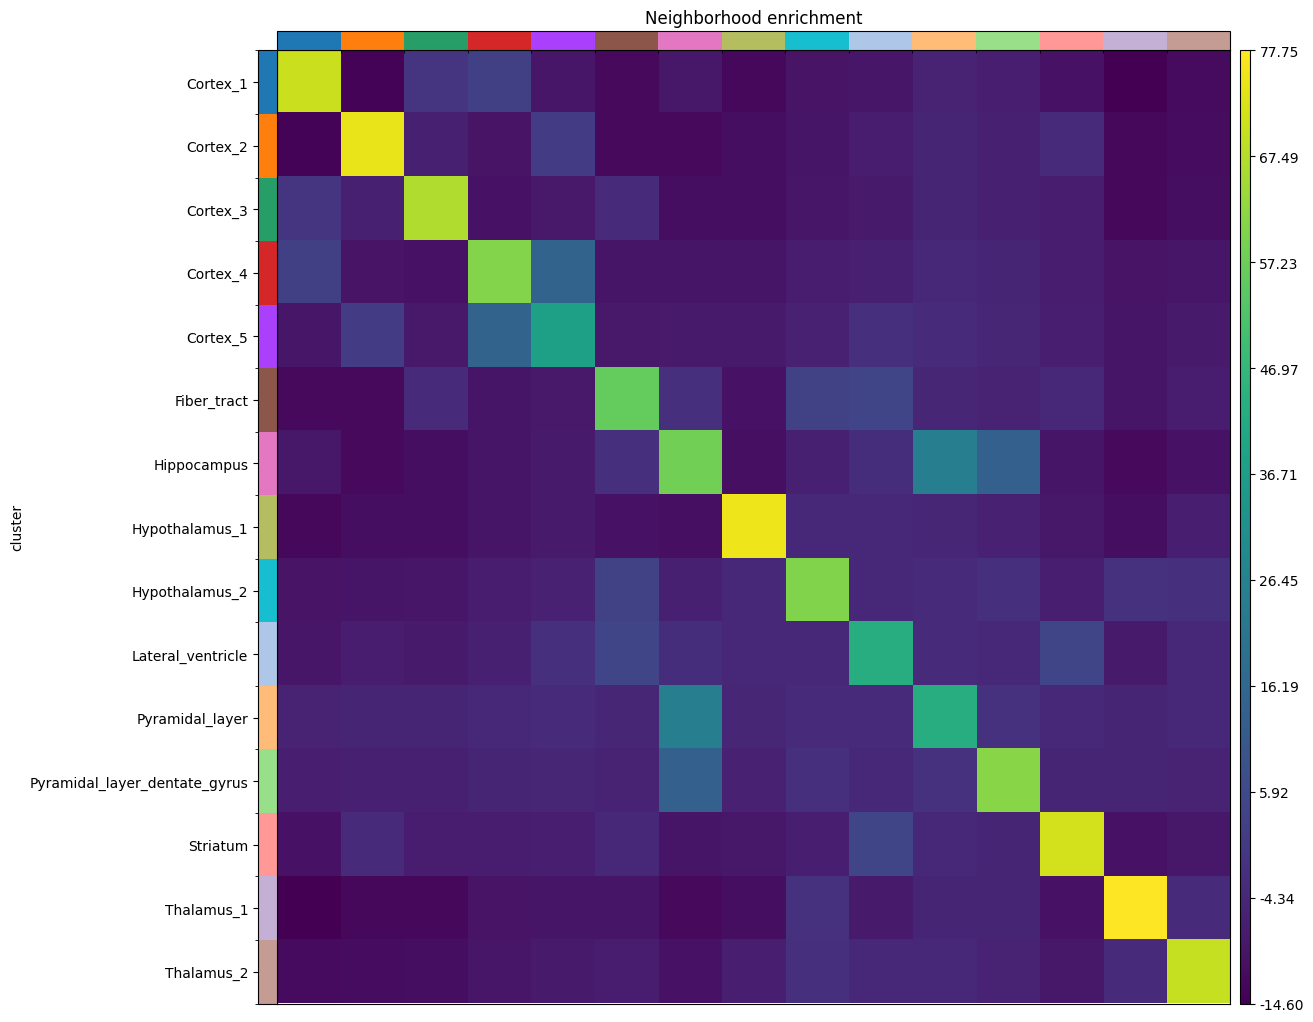

In [26]:
sq.gr.spatial_neighbors(adata)
sq.gr.nhood_enrichment(adata, cluster_key="cluster")
sq.pl.nhood_enrichment(adata, cluster_key="cluster")

  0%|          | 0/1 [00:00<?, ?/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


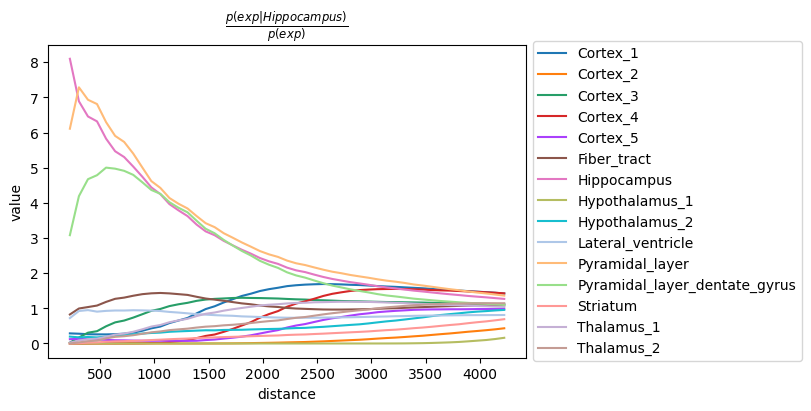

In [27]:
sq.gr.co_occurrence(adata, cluster_key="cluster")
sq.pl.co_occurrence(
    adata,
    cluster_key="cluster",
    clusters="Hippocampus",
    figsize=(8, 4),
)

In [32]:
genes = adata[:, adata.var.highly_variable].var_names.values[:1000]
sq.gr.spatial_autocorr(
    adata,
    mode="moran",
    genes=genes,
    n_perms=100,
    n_jobs=1,
)

  0%|          | 0/100 [00:00<?, ?/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [35]:
adata.uns["moranI"]

,I,pval_norm,var_norm,pval_z_sim,pval_sim,var_sim,pval_norm_fdr_bh,pval_z_sim_fdr_bh,pval_sim_fdr_bh
Olfm1,0.763291,0.000000,0.000131,0.000000,0.009901,0.000317,0.000000,0.000000,0.011662
Plp1,0.747660,0.000000,0.000131,0.000000,0.009901,0.000283,0.000000,0.000000,0.011662
Itpka,0.727076,0.000000,0.000131,0.000000,0.009901,0.000266,0.000000,0.000000,0.011662
Snap25,0.720987,0.000000,0.000131,0.000000,0.009901,0.000273,0.000000,0.000000,0.011662
Nnat,0.708637,0.000000,0.000131,0.000000,0.009901,0.000256,0.000000,0.000000,0.011662
...,...,...,...,...,...,...,...,...,...
Gm43403,-0.007072,0.278939,0.000131,0.183628,0.138614,0.000076,0.308561,0.203353,0.151822
Gm33940,-0.007525,0.265801,0.000131,0.177133,0.148515,0.000052,0.294353,0.196378,0.161605
Uprt,-0.009072,0.223366,0.000131,0.125714,0.059406,0.000069,0.248185,0.140935,0.066823
Dkk2,-0.009386,0.215245,0.000131,0.133901,0.049505,0.000067,0.239693,0.149443,0.056128


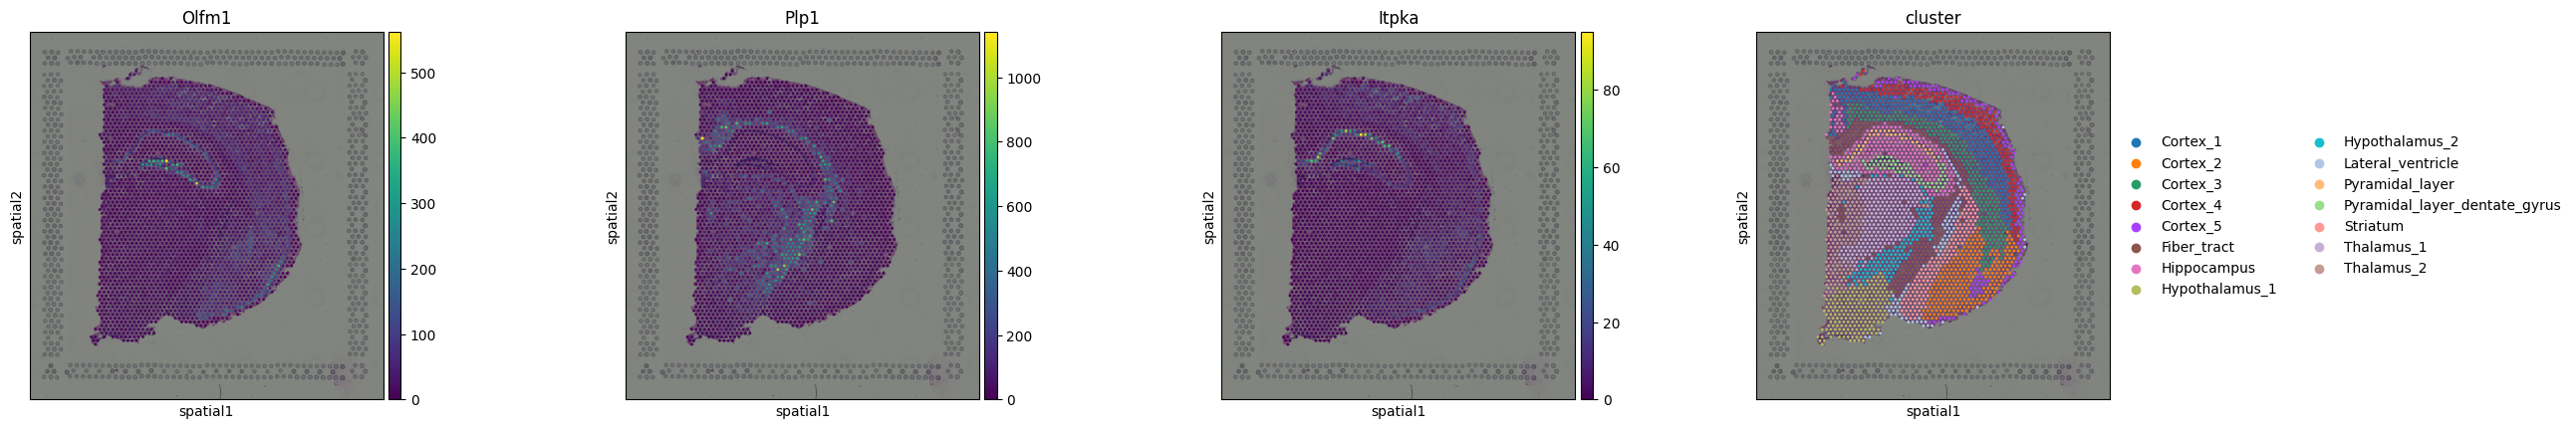

In [37]:
sq.pl.spatial_scatter(adata, color=["Olfm1", "Plp1", "Itpka", "cluster"])